In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import requests

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [52]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [53]:
DIR_TRAIN = '../../Data/Use/Train/'
DIR_TEST = '../../Data/Use/Test/'
DIR_VALID = '../../Data/Use/Valid/'

os.listdir(DIR_TRAIN)

['CASPIAN TERN',
 'D-ARNAUDS BARBET',
 'DARK EYED JUNCO',
 'HOUSE FINCH',
 'OVENBIRD',
 'OYSTER CATCHER',
 'RED TAILED HAWK',
 'SWINHOES PHEASANT',
 'VIOLET GREEN SWALLOW',
 'WOOD DUCK']

In [54]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=tf.keras.applications.resnet50.preprocess_input)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

train_datagen = train_datagen.flow_from_directory(DIR_TRAIN,
                                                target_size=(224,224), 
                                                color_mode='rgb', 
                                                class_mode='categorical', 
                                                batch_size=16,
                                                shuffle=True)

test_datagen = test_datagen.flow_from_directory(DIR_TEST,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                class_mode='categorical',
                                                batch_size=16,
                                                shuffle=True)

valid_datagen = valid_datagen.flow_from_directory(DIR_VALID,
                                                target_size=(224,224), 
                                                color_mode='rgb', 
                                                class_mode='categorical', 
                                                batch_size=16,
                                                shuffle=True)

Found 1000 images belonging to 10 classes.
Found 50 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [148]:
expe = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, preprocessing_function=tf.keras.applications.resnet50.preprocess_input)

expe = expe.flow_from_directory('../../Data/Use/Preprocessed/Augmented/',
                                                target_size=(100,100), 
                                                color_mode='rgb', 
                                                class_mode='categorical', 
                                                batch_size=32,
                                                shuffle=True)

Found 2000 images belonging to 10 classes.


In [149]:
X = np.concatenate([expe.next()[0] for i in range(expe.__len__())])
y = np.concatenate([expe.next()[1] for i in range(expe.__len__())])

In [150]:
X.shape

(2000, 100, 100, 3)

In [157]:
ResNet50_PreTrained = tf.keras.applications.ResNet50(include_top=True, weights='imagenet', input_shape=(224,224,3), input_tensor=None, pooling='max', classes=1000)

In [158]:
ResNet50_PreTrained.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

[('n04131690', 'saltshaker', 0.9636666),
 ('n03937543', 'pill_bottle', 0.015926512),
 ('n07932039', 'eggnog', 0.012194127)]

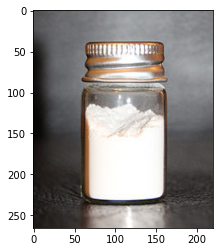

In [168]:
img = Image.open(requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Sample_of_silicon_dioxide.jpg/220px-Sample_of_silicon_dioxide.jpg', stream=True).raw)
plt.imshow(img)
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.cast(img, tf.float32)
img = tf.image.resize(img, (224,224))
img = tf.expand_dims(img, axis=0)
img = tf.keras.applications.resnet50.preprocess_input(img)

res_pred = ResNet50_PreTrained.predict(img)
top_pred = tf.keras.applications.resnet50.decode_predictions(res_pred, top=3)[0]

top_pred

_________________

In [154]:
Res50 = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(100,100,3))

x = Res50.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512/4, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
pred = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(Res50.input, pred)

In [155]:
model.build(input_shape=(None, 100, 100, 3))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [156]:
model.fit(X, y, epochs=30)

Epoch 1/30
63/63 [==============================] - 12s 125ms/step - loss: 2.4462 - accuracy: 0.0875
Epoch 2/30
63/63 [==============================] - 8s 125ms/step - loss: 2.3025 - accuracy: 0.1020
Epoch 3/30
63/63 [==============================] - 8s 125ms/step - loss: 2.3019 - accuracy: 0.1070
Epoch 4/30
63/63 [==============================] - 8s 125ms/step - loss: 2.3020 - accuracy: 0.1160
Epoch 5/30
63/63 [==============================] - 8s 125ms/step - loss: 2.2998 - accuracy: 0.1110
Epoch 6/30
63/63 [==============================] - 8s 125ms/step - loss: 2.3008 - accuracy: 0.1085
Epoch 7/30
63/63 [==============================] - 8s 121ms/step - loss: 2.2995 - accuracy: 0.1100
Epoch 8/30
63/63 [==============================] - 8s 123ms/step - loss: 2.2908 - accuracy: 0.1210
Epoch 9/30
63/63 [==============================] - 8s 121ms/step - loss: 2.2984 - accuracy: 0.1125
Epoch 10/30
63/63 [==============================] - 8s 120ms/step - loss: 2.3025 - accuracy: 0.112

______________________

In [21]:
class ResNet50(tf.keras.Model):
    def __init__(self, num_classes):
        super(ResNet50, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(7,7), strides=(2,2), padding='same', activation='relu')
        self.maxpool1 = tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')
        self.block1 = self.residual_block(64)
        self.block2 = self.residual_block(128)
        self.block3 = self.residual_block(256)
        self.block4 = self.residual_block(512)
        self.avgpool = tf.keras.layers.GlobalAveragePooling2D()
        self.fc = tf.keras.layers.Dense(units=num_classes, activation='softmax')
    
    def residual_block(self, filters):
        def f(x):
            x_shortcut = x
            x = tf.keras.layers.Conv2D(filters=filters, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
            x = tf.keras.layers.Conv2D(filters=filters, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(x)
            x = tf.keras.layers.Add()([x, x_shortcut])
            x = tf.keras.layers.Activation('relu')(x)
            return x
        return f

    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.avgpool(x)
        x = self.fc(x)
        return x


In [50]:
model = ResNet50(num_classes=10)

model.build(input_shape=(None, 224, 224, 3))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

ValueError: Operands could not be broadcast together with shapes (56, 56, 128) (56, 56, 64)

____________

Pretrained

In [44]:
model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3), classes=10)

In [45]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
X = np.concatenate([train_datagen.next()[0] for i in range(train_datagen.__len__())])
y = np.concatenate([train_datagen.next()[1] for i in range(train_datagen.__len__())])

In [49]:
model.fit(X, y, epochs=10, validation_data=valid_datagen)

Epoch 1/10


ValueError: in user code:

    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\keras\engine\training.py:789 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\keras\losses.py:1666 categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Maxi\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 10) and (None, 7, 7, 2048) are incompatible
